In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data.csv', sep=";", parse_dates=True, index_col="timestamps_UTC")

Drop duplicates & data from 2022

In [7]:
df = df.drop_duplicates()
df = df[~df.index.year.isin([2022])]
df_dropped = df.dropna()
df_clean = df_dropped

Drop rows where both motors are off

In [8]:
motor_stopped = (df_dropped['RS_E_RPM_PC1'] == 0) & (df_dropped['RS_E_RPM_PC2'] == 0)
df_motor_stopped = df_clean[motor_stopped]
df_motor_stopped['reason'] = 'Motor stopped'
df_dropped = df_dropped[~motor_stopped] 
df_motor_stopped

C:\Users\tangu\AppData\Local\Temp\ipykernel_5268\2241046109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motor_stopped['reason'] = 'Motor stopped'


,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-08-01 07:02:27,34,109.0,51.015920,3.774811,56.0,56.0,3.0,20.0,0.0,0.0,82.0,79.0,83.0,77.0,14.9,0.0,19.4,3.0,Motor stopped
2023-08-24 20:33:12,72,189.0,51.013358,3.780457,40.0,40.0,0.0,6.0,0.0,0.0,33.0,35.0,28.0,31.0,21.8,0.3,7.4,2.8,Motor stopped
2023-08-24 09:44:38,113,145.0,51.015324,3.775732,45.0,61.0,17.0,6.0,0.0,0.0,80.0,79.0,82.0,81.0,23.2,0.0,9.8,2.8,Motor stopped
2023-08-23 22:42:39,149,181.0,51.189727,5.110092,65.0,61.0,0.0,20.0,0.0,0.0,81.0,85.0,81.0,83.0,20.3,0.0,10.7,4.3,Motor stopped
2023-08-24 12:04:19,186,189.0,51.013327,3.780612,31.0,32.0,0.0,6.0,0.0,0.0,30.0,31.0,23.0,25.0,24.1,0.1,8.7,2.3,Motor stopped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 12:05:42,17679051,151.0,51.013307,3.780388,51.0,38.0,13.0,3.0,0.0,0.0,65.0,71.0,27.0,65.0,14.0,1.8,14.2,0.0,Motor stopped
2023-05-09 09:36:58,17679058,122.0,51.014160,3.779879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,60.0,13.8,0.7,15.3,0.0,Motor stopped
2023-05-09 12:02:05,17679063,112.0,51.015937,3.774814,59.0,58.0,0.0,3.0,0.0,0.0,66.0,75.0,70.0,73.0,14.0,1.8,14.2,0.0,Motor stopped


In [5]:
features = ['RS_E_InAirTemp', 'RS_E_OilPress', 'RS_E_RPM', 'RS_E_WatTemp', 'RS_T_OilTemp']

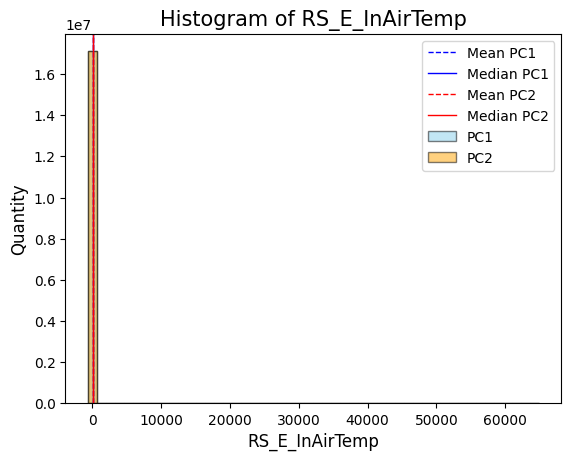

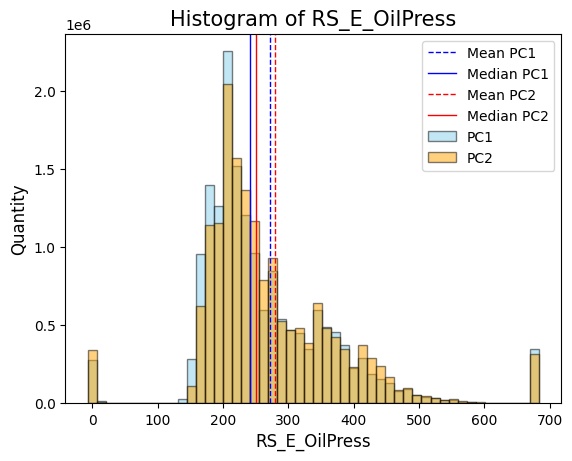

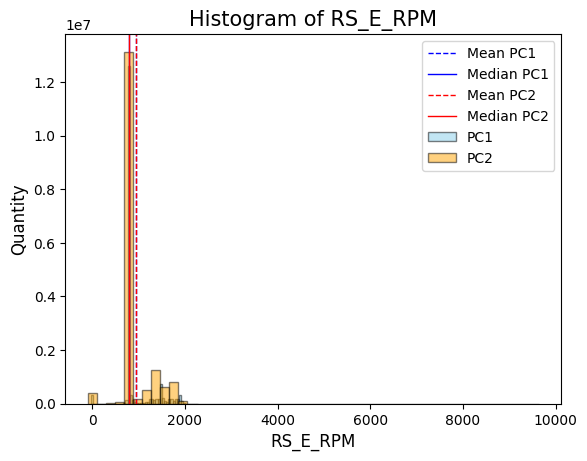

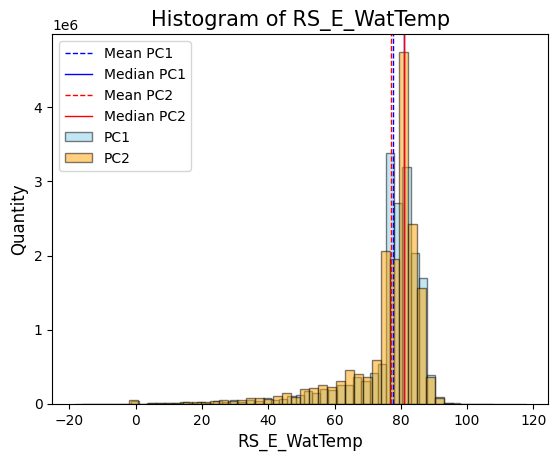

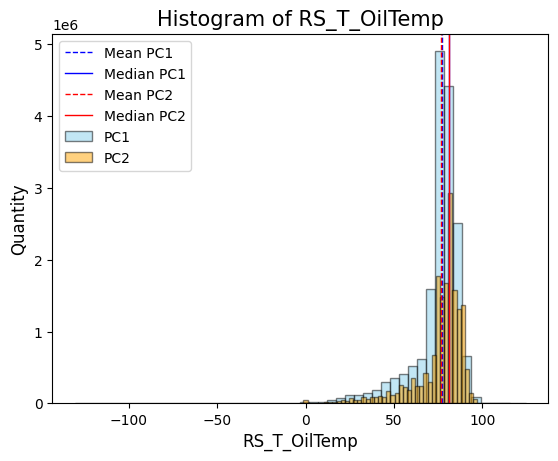

In [6]:
for feature in features:
    pc1_values = df_dropped[f'{feature}_PC1']
    pc2_values = df_dropped[f'{feature}_PC2']

    # Calculate mean and median
    mean_pc1, mean_pc2 = pc1_values.mean(), pc2_values.mean()
    median_pc1, median_pc2 = pc1_values.median(), pc2_values.median()

    # Create histograms
    hist_pc1, bins_pc1 = np.histogram(pc1_values, bins=50)
    hist_pc2, bins_pc2 = np.histogram(pc2_values, bins=50)
 
    plt.figure()

    # Plot histograms
    plt.bar(bins_pc1[:-1], hist_pc1, width=(bins_pc1[1]-bins_pc1[0]), color='skyblue', edgecolor='black', alpha=0.5, label='PC1')
    plt.bar(bins_pc2[:-1], hist_pc2, width=(bins_pc2[1]-bins_pc2[0]), color='orange', edgecolor='black', alpha=0.5, label='PC2')

    # Plot mean and median lines
    plt.axvline(mean_pc1, color='blue', linestyle='dashed', linewidth=1, label='Mean PC1')
    plt.axvline(median_pc1, color='blue', linestyle='solid', linewidth=1, label='Median PC1')
    plt.axvline(mean_pc2, color='red', linestyle='dashed', linewidth=1, label='Mean PC2')
    plt.axvline(median_pc2, color='red', linestyle='solid', linewidth=1, label='Median PC2')

    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Quantity', size=12)
    plt.legend()

    # plt.show()
    plt.savefig(f'explo/before_{feature}.png')

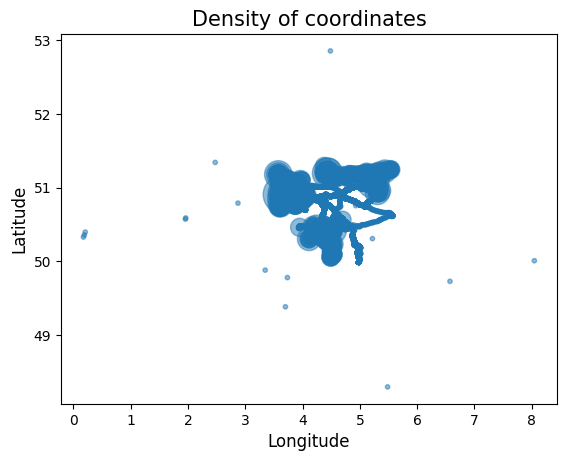

In [8]:
location_counts = df_dropped.groupby(['lat', 'lon']).size().reset_index(name='count')

plt.figure()
plt.scatter(location_counts['lon'], location_counts['lat'], s=location_counts['count']*10, alpha=0.5)

plt.title('Density of coordinates', size=15)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# plt.show()
plt.savefig("explo/before_log.png")

Clean in_air_temp
- Remove values outside of range [0, 100] -> sensor problem : values outside are not possible

In [9]:
df_air_temp_out = df_clean[(df_clean['RS_E_InAirTemp_PC1'] < 0) | (df_clean['RS_E_InAirTemp_PC1'] > 100)]
df_dropped = df_dropped[(df_dropped['RS_E_InAirTemp_PC1'] >= 0) & (df_dropped['RS_E_InAirTemp_PC1'] <= 100)]
df_air_temp_out = df_clean[(df_clean['RS_E_InAirTemp_PC2'] < 0) | (df_clean['RS_E_InAirTemp_PC2'] > 100)]
df_dropped = df_dropped[(df_dropped['RS_E_InAirTemp_PC2'] >= 0) & (df_dropped['RS_E_InAirTemp_PC2'] <= 100)]
df_air_temp_out['reason'] = 'Air temp out'
df_air_temp_out

C:\Users\tangu\AppData\Local\Temp\ipykernel_5268\2253877948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_temp_out['reason'] = 'Air temp out'


,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-03-01 04:14:01,233506,106.0,50.094578,4.527364,65534.0,65534.0,355.0,307.0,798.0,794.0,48.0,66.0,49.0,63.0,-2.2,0.0,10.9,0.0,Air temp out
2023-03-01 04:17:05,277051,106.0,50.094582,4.527362,65535.0,65534.0,355.0,310.0,798.0,809.0,49.0,65.0,50.0,62.0,-2.2,0.0,10.9,0.0,Air temp out
2023-03-01 04:02:03,285795,106.0,50.094833,4.526853,65534.0,65534.0,348.0,317.0,800.0,805.0,53.0,63.0,50.0,60.0,-2.2,0.0,10.9,0.0,Air temp out
2023-01-29 06:06:43,474415,106.0,50.401092,4.456672,65533.0,65532.0,600.0,562.0,800.0,801.0,11.0,13.0,3.0,1.0,-0.2,0.0,9.2,0.0,Air temp out
2023-01-25 15:17:57,479908,156.0,51.026731,3.752241,11.0,65535.0,431.0,476.0,900.0,894.0,54.0,50.0,55.0,49.0,-0.2,0.0,4.1,0.0,Air temp out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-29 06:33:43,17031731,106.0,50.401122,4.456673,0.0,65534.0,479.0,476.0,794.0,803.0,39.0,47.0,28.0,30.0,-0.2,0.0,9.2,0.0,Air temp out
2023-01-29 06:37:49,17031733,106.0,50.401137,4.456000,0.0,65534.0,465.0,451.0,800.0,798.0,41.0,50.0,33.0,34.0,-0.2,0.0,9.2,0.0,Air temp out
2023-01-29 06:09:43,17035934,106.0,50.401113,4.456670,65533.0,65532.0,579.0,555.0,804.0,802.0,18.0,21.0,4.0,4.0,-0.2,0.0,9.2,0.0,Air temp out


Clean oil_press


Clean RPM

In [10]:
df_RPM_out = df_clean[(df_clean['RS_E_RPM_PC1'] < 0) | (df_clean['RS_E_RPM_PC1'] > 2100)]
df_dropped = df_dropped[(df_dropped['RS_E_RPM_PC1'] >= 0) & (df_dropped['RS_E_RPM_PC1'] <= 2100)]
df_RPM_out = df_clean[(df_clean['RS_E_RPM_PC2'] < 0) | (df_clean['RS_E_RPM_PC2'] > 2100)]
df_dropped = df_dropped[(df_dropped['RS_E_RPM_PC2'] >= 0) & (df_dropped['RS_E_RPM_PC2'] <= 2100)]
df_RPM_out['reason'] = 'RPM out'
df_RPM_out

C:\Users\tangu\AppData\Local\Temp\ipykernel_5268\2163375723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RPM_out['reason'] = 'RPM out'


,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-08-09 14:36:05,19894,194.0,50.777208,3.874036,39.0,36.0,386.0,448.0,2274.0,2272.0,77.0,79.0,75.0,79.0,20.4,0.0,14.3,7.2,RPM out
2023-08-17 15:40:29,55165,164.0,51.033765,5.329525,31.0,0.0,396.0,0.0,1389.0,9732.0,83.0,0.0,82.0,84.0,21.8,0.0,11.5,2.4,RPM out
2023-05-31 05:07:14,301514,138.0,51.032056,3.725004,39.0,35.0,403.0,379.0,1912.0,2275.0,87.0,82.0,84.0,85.0,10.9,0.0,14.3,10.6,RPM out
2023-02-18 13:15:55,398941,172.0,51.195469,4.435570,28.0,33.0,348.0,445.0,1278.0,2225.0,79.0,78.0,81.0,79.0,10.7,0.0,25.8,0.0,RPM out
2023-06-29 18:04:46,429680,197.0,50.191530,4.535993,36.0,43.0,313.0,424.0,1560.0,2102.0,86.0,81.0,83.0,89.0,19.1,0.1,16.6,11.2,RPM out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11 05:45:57,17492171,197.0,50.184786,4.530691,39.0,47.0,334.0,410.0,1928.0,2106.0,85.0,86.0,83.0,87.0,17.5,0.0,13.0,76.2,RPM out
2023-05-16 14:46:46,17498989,129.0,50.860956,3.812971,38.0,35.0,300.0,441.0,1917.0,2268.0,82.0,90.0,85.0,90.0,13.2,0.0,18.6,2.8,RPM out
2023-07-05 18:36:50,17581431,197.0,50.320076,4.404948,43.0,41.0,351.0,462.0,1793.0,2139.0,84.0,83.0,82.0,85.0,17.3,0.8,16.9,24.1,RPM out


Clean water_temp
- Remove values outside of range [0, 100] -> sensor problem : values outside are abnormal

In [11]:
df_water_temp_out = df_clean[(df_clean['RS_E_WatTemp_PC1'] < 0) | (df_clean['RS_E_WatTemp_PC1'] > 100)]
df_dropped = df_dropped[(df_dropped['RS_E_WatTemp_PC1'] >= 0) & (df_dropped['RS_E_WatTemp_PC1'] <= 100)]
df_water_temp_out = df_clean[(df_clean['RS_E_WatTemp_PC2'] < 0) | (df_clean['RS_E_WatTemp_PC2'] > 100)]
df_dropped = df_dropped[(df_dropped['RS_E_WatTemp_PC2'] >= 0) & (df_dropped['RS_E_WatTemp_PC2'] <= 100)]
df_water_temp_out['reason'] = 'Water temp out'
df_water_temp_out

C:\Users\tangu\AppData\Local\Temp\ipykernel_5268\3847200202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water_temp_out['reason'] = 'Water temp out'


,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-08-20 10:44:04,39101,164.0,51.144044,5.216783,68.0,22.5,393.0,184.5,1947.0,974.0,86.0,-8.5,85.5,85.0,21.6,0.0,2.5,5.0,Water temp out
2023-08-20 12:39:08,55670,128.0,51.097970,5.236525,54.0,52.0,6.0,3.0,0.0,0.0,47.0,101.0,57.0,114.0,23.6,0.0,2.1,4.6,Water temp out
2023-06-02 12:38:21,148470,134.0,51.109090,5.249658,38.0,47.0,3.0,317.0,0.0,1496.0,33.0,101.0,42.0,99.0,14.5,0.0,14.1,21.3,Water temp out
2023-06-21 17:45:29,173387,172.0,50.990782,5.348766,46.0,61.0,175.0,210.0,838.0,813.0,90.0,101.0,95.0,106.0,25.0,0.0,7.9,44.0,Water temp out
2023-06-19 15:54:33,184083,172.0,50.974047,5.346306,48.0,63.0,162.0,165.0,795.0,798.0,86.0,101.0,91.0,106.0,23.7,0.0,9.2,47.4,Water temp out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28 12:43:16,17337746,151.0,50.869108,3.814784,33.0,53.0,189.0,186.0,799.0,796.0,82.0,102.0,80.0,105.0,20.9,0.0,15.3,22.1,Water temp out
2023-07-08 13:05:48,17491559,128.0,50.991536,5.348739,67.0,51.0,6.0,296.5,0.0,1695.0,55.0,100.5,68.5,116.0,29.0,0.0,4.3,39.2,Water temp out
2023-05-04 16:36:29,17505475,134.0,51.091186,5.235092,46.0,40.0,476.0,317.0,1867.0,1887.0,83.0,101.0,90.0,101.0,22.0,0.0,15.0,33.6,Water temp out


Clean oil_temp
- Remove values outside of range [0, 150] -> sensor problem : values outside are abnormal

In [12]:
df_oil_temp_out = df_clean[(df_clean['RS_T_OilTemp_PC1'] < 0) | (df_clean['RS_T_OilTemp_PC1'] > 150)]
df_dropped = df_dropped[(df_dropped['RS_T_OilTemp_PC1'] >= 0) & (df_dropped['RS_T_OilTemp_PC1'] <= 150)]
df_oil_temp_out = df_clean[(df_clean['RS_T_OilTemp_PC2'] < 0) | (df_clean['RS_T_OilTemp_PC2'] > 150)]
df_dropped = df_dropped[(df_dropped['RS_T_OilTemp_PC2'] >= 0) & (df_dropped['RS_T_OilTemp_PC2'] <= 150)]
df_oil_temp_out['reason'] = 'Oil temp out'
df_oil_temp_out

,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,


Clean coordinates

In [13]:
df_coordinates_out = df_clean[(df_clean['lon'] < 3.2) | (df_clean['lon'] > 6)]
df_dropped = df_dropped[(df_dropped['lon'] >= 3.2) & (df_dropped['lon'] <= 6)]
df_coordinates_out = df_clean[(df_clean['lat'] < 49.5) | (df_clean['lat'] > 51.5)]
df_dropped = df_dropped[(df_dropped['lat'] >= 49.5) & (df_dropped['lat'] <= 51.5)]
df_coordinates_out['reason'] = 'Coordinates out'
df_coordinates_out

C:\Users\tangu\AppData\Local\Temp\ipykernel_5268\1021083449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordinates_out['reason'] = 'Coordinates out'


,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,reason
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-05-09 03:34:41,9909128,194.0,52.857059,4.485541,18.0,30.0,224.0,255.0,801.0,793.0,75.0,73.0,66.0,67.0,13.4,0.0,10.5,2.3,Coordinates out
2023-04-10 08:28:00,10057146,194.0,49.383591,3.700235,37.0,40.0,318.5,377.0,865.0,1708.5,43.0,87.0,83.5,88.0,9.1,0.0,17.2,252.0,Coordinates out
2023-01-25 06:22:40,16532517,194.0,48.295677,5.484127,31.0,38.0,175.0,203.0,0.0,804.0,83.0,87.0,82.0,87.0,-2.3,0.0,3.4,0.0,Coordinates out


In [14]:
df_outliers = pd.concat([df_motor_stopped, df_air_temp_out, df_oil_temp_out, df_water_temp_out, df_RPM_out, df_coordinates_out])
df_outliers.to_csv('ar41_for_ulb_all_outliers.csv', sep=';')

Plot after cleaning

In [15]:
print(len(df))
print(len(df_dropped))

17679239
17096900


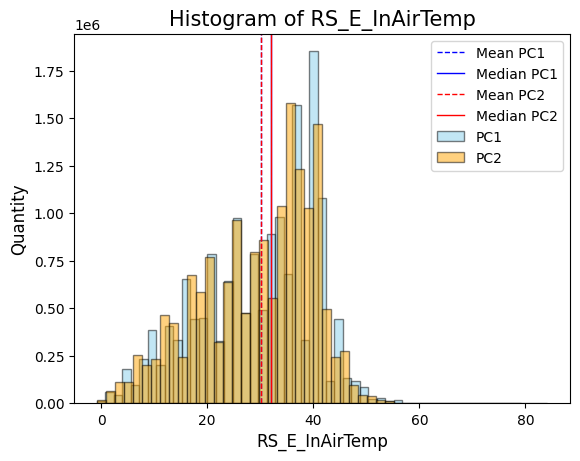

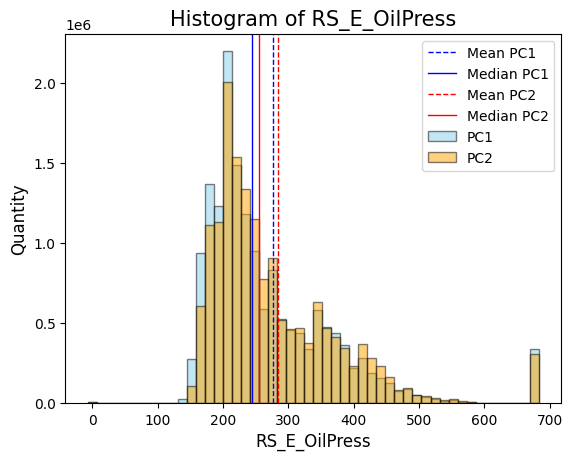

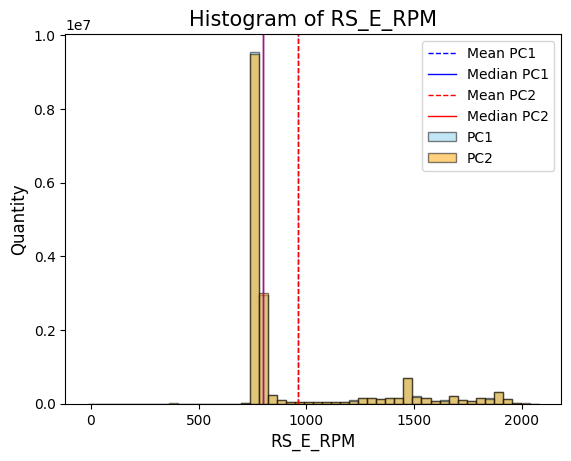

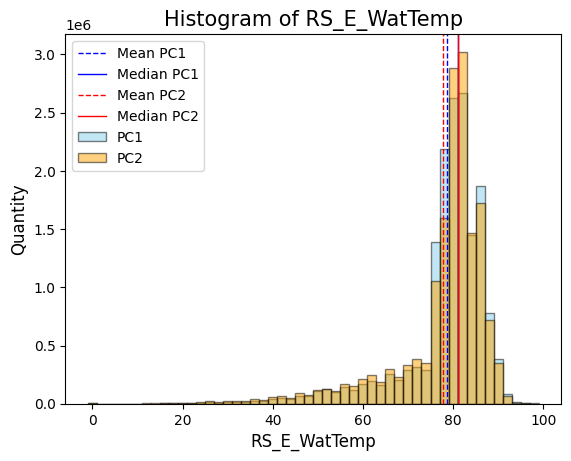

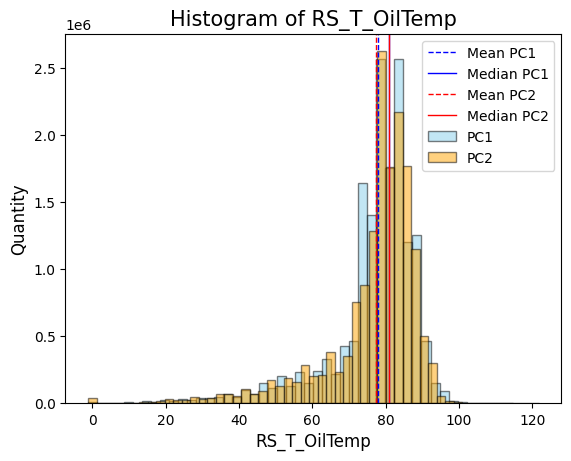

In [16]:

for feature in features:
    pc1_values = df_dropped[f'{feature}_PC1']
    pc2_values = df_dropped[f'{feature}_PC2']

    # Calculate mean and median
    mean_pc1, mean_pc2 = pc1_values.mean(), pc2_values.mean()
    median_pc1, median_pc2 = pc1_values.median(), pc2_values.median()

    # Create histograms
    hist_pc1, bins_pc1 = np.histogram(pc1_values, bins=50)
    hist_pc2, bins_pc2 = np.histogram(pc2_values, bins=50)
 
    plt.figure()

    # Plot histograms
    plt.bar(bins_pc1[:-1], hist_pc1, width=(bins_pc1[1]-bins_pc1[0]), color='skyblue', edgecolor='black', alpha=0.5, label='PC1')
    plt.bar(bins_pc2[:-1], hist_pc2, width=(bins_pc2[1]-bins_pc2[0]), color='orange', edgecolor='black', alpha=0.5, label='PC2')

    # Plot mean and median lines
    plt.axvline(mean_pc1, color='blue', linestyle='dashed', linewidth=1, label='Mean PC1')
    plt.axvline(median_pc1, color='blue', linestyle='solid', linewidth=1, label='Median PC1')
    plt.axvline(mean_pc2, color='red', linestyle='dashed', linewidth=1, label='Mean PC2')
    plt.axvline(median_pc2, color='red', linestyle='solid', linewidth=1, label='Median PC2')

    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Quantity', size=12)
    plt.legend()

    # plt.show()
    plt.savefig(f'explo/after_{feature}.png')

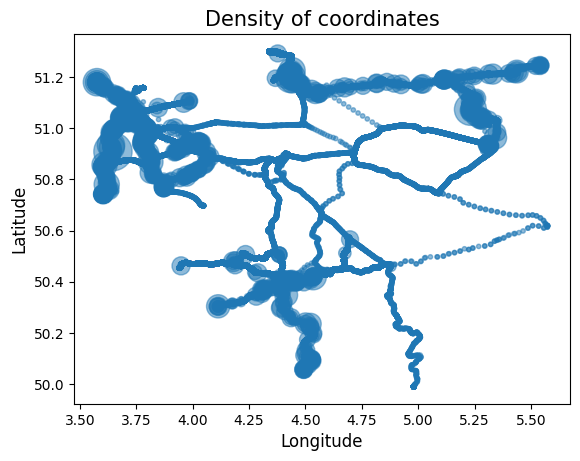

In [17]:
location_counts = df_dropped.groupby(['lat', 'lon']).size().reset_index(name='count')

plt.figure()
plt.scatter(location_counts['lon'], location_counts['lat'], s=location_counts['count']*10, alpha=0.5)

plt.title('Density of coordinates', size=15)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

# plt.show()
plt.savefig("explo/after_log.png")

In [16]:
df_dropped.to_csv('ar41_for_ulb_cleaned.csv', sep=";")

In [13]:
df_dropped.describe()

,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
count,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07,1.709690e+07
mean,8.839709e+06,1.508517e+02,5.087449e+01,4.230025e+00,3.016920e+01,3.028688e+01,2.719447e+02,2.791963e+02,9.425816e+02,9.379821e+02,7.777614e+01,7.699686e+01,7.714116e+01,7.675854e+01,1.247076e+01,1.023438e-01,1.332130e+01,1.754957e+01
std,5.103301e+06,2.696838e+01,3.154150e-01,5.982356e-01,1.113207e+01,1.100058e+01,1.066121e+02,1.069937e+02,3.510590e+02,3.572766e+02,1.189415e+01,1.287388e+01,1.361598e+01,1.452263e+01,7.228992e+00,3.778260e-01,6.136097e+00,3.706752e+01
min,0.000000e+00,1.020000e+02,4.978008e+01,3.347395e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.200000e+00,0.000000e+00,4.000000e-01,0.000000e+00
25%,4.420495e+06,1.280000e+02,5.077047e+01,3.711549e+00,2.200000e+01,2.200000e+01,2.070000e+02,2.130000e+02,7.980000e+02,7.980000e+02,7.700000e+01,7.600000e+01,7.500000e+01,7.500000e+01,6.900000e+00,0.000000e+00,8.700000e+00,1.000000e-01
50%,8.839488e+06,1.510000e+02,5.099660e+01,3.878400e+00,3.200000e+01,3.200000e+01,2.410000e+02,2.510000e+02,8.010000e+02,8.010000e+02,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,1.260000e+01,0.000000e+00,1.270000e+01,2.300000e+00
75%,1.325897e+07,1.740000e+02,5.108901e+01,4.535297e+00,3.900000e+01,3.900000e+01,3.240000e+02,3.340000e+02,8.150000e+02,8.147500e+02,8.400000e+01,8.400000e+01,8.500000e+01,8.500000e+01,1.790000e+01,0.000000e+00,1.710000e+01,1.900000e+01
max,1.767927e+07,1.970000e+02,5.130289e+01,5.573141e+00,9.100000e+01,9.500000e+01,6.900000e+02,6.900000e+02,2.100000e+03,2.100000e+03,1.000000e+02,1.000000e+02,1.270000e+02,1.160000e+02,3.010000e+01,4.700000e+00,4.050000e+01,4.911000e+02
